Importing Required Libraries and Modules

In [1]:
# Data Preprocessing and Visualization Libraries and Modules
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Machine Learning Library and Modules
warnings.filterwarnings("ignore")


Reading Training And Testing Dataset As DataFrame

In [2]:
df_train = pd.read_csv("NSL_KDD_Train.csv")
df_train.head()


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
df_test = pd.read_csv("NSL_KDD_Test.csv")
df_test.head()


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


Add Columns Name to the above DataFrame

In [4]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]


In [5]:
df_test = pd.read_csv("NSL_KDD_Test.csv", header=None, names=columns)
df_train = pd.read_csv("NSL_KDD_Train.csv", header=None, names=columns)


In [6]:
df_test.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [7]:
df_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Extrapolatry Data Analysis(EDA)

In [8]:
print("Number of instances in test dataset:", df_test.shape[0])


Number of instances in test dataset: 22544


In [9]:
print("Number of instances in train dataset:", df_train.shape[0])


Number of instances in train dataset: 125973


In [10]:
df_test.info()
# NO NULL ENTRIES ARE AVAILABLE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [11]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
df_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [13]:
df_test.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22544.0,10395.450231,472786.431088,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22544.0,2056.018808,21219.297609,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


In [14]:
df_train.isnull().values.any()


False

In [15]:
df_test.isnull().values.any()


False

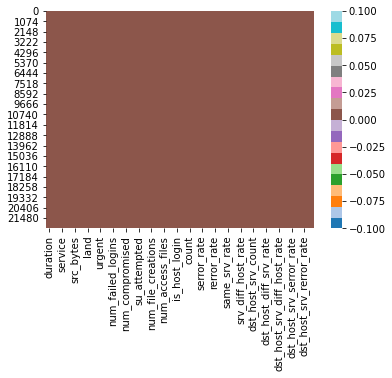

In [16]:
sns.heatmap(df_test.isnull(), cmap="tab20")


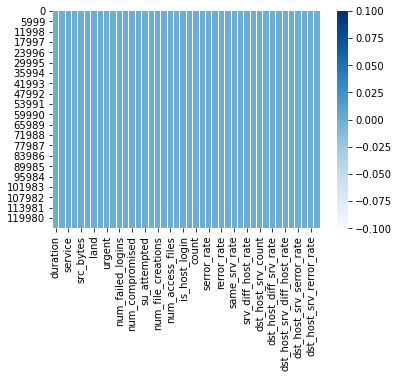

In [17]:
sns.heatmap(df_train.isnull(), cmap="Blues")


In [18]:
df_train.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [19]:
uniqueValues = df_train.nunique().tolist()
labels = df_train.columns


<BarContainer object of 42 artists>

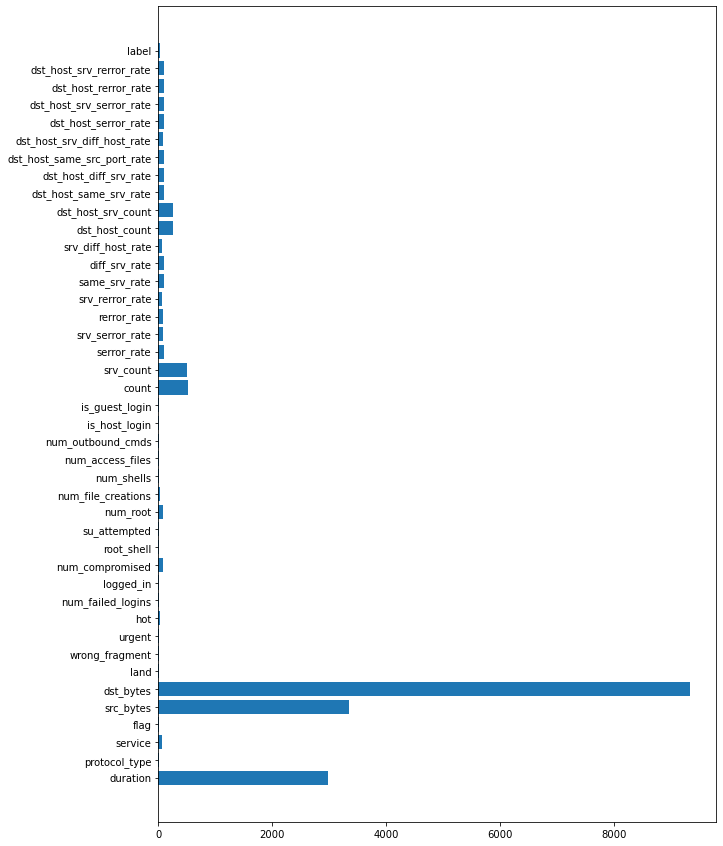

In [20]:
plt.figure(figsize=(10, 15))
plt.barh(labels, uniqueValues)


In [21]:
df_test.nunique()
# number of unique values in service in test is 6 less than train dataset need to be handled later


duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [22]:
df_train.dtypes
# protocol_type ,service and flag have object data type which need to be handled later before training the model


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [23]:
# this is deleted because it had only zero value filled in the whole dataset
df_train.drop(columns="num_outbound_cmds", inplace=True)
df_test.drop(columns="num_outbound_cmds", inplace=True)


Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


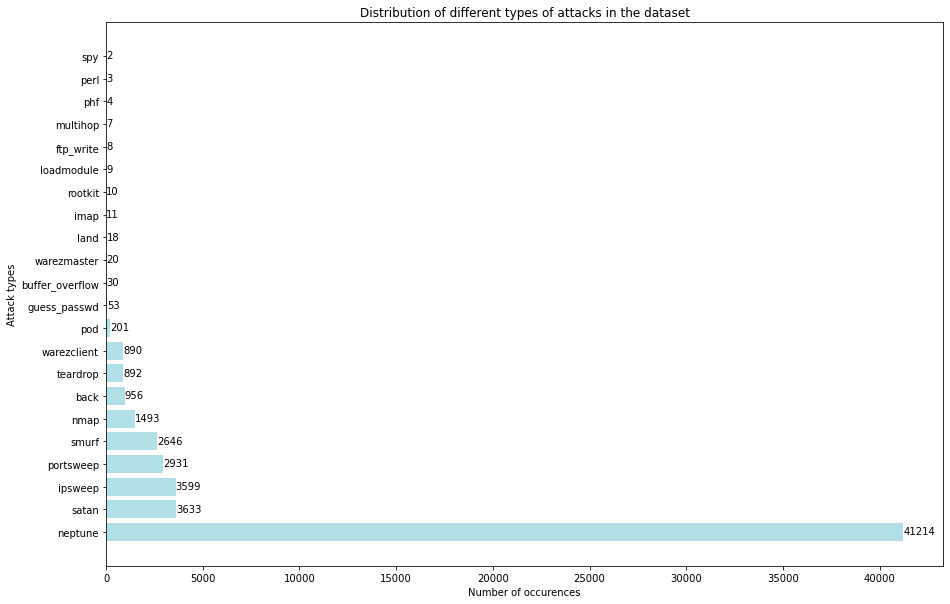

In [24]:
# label distribution of Training set and testing set
print('Label distribution Training set:')
print(df_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())
plt.figure(figsize=(15, 10))

attack = ("neptune", 'satan', "ipsweep", "portsweep", 'smurf', "nmap", 'back', 'teardrop', 'warezclient', 'pod', 'guess_passwd', 'buffer_overflow', 'warezmaster',
          "land", 'imap', 'rootkit', 'loadmodule', 'ftp_write', 'multihop', 'phf', 'perl', 'spy')
y_pos = np.arange(len(attack))
amount = df_train['label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='Powderblue')
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1, str(v))


In [25]:
df_train.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219


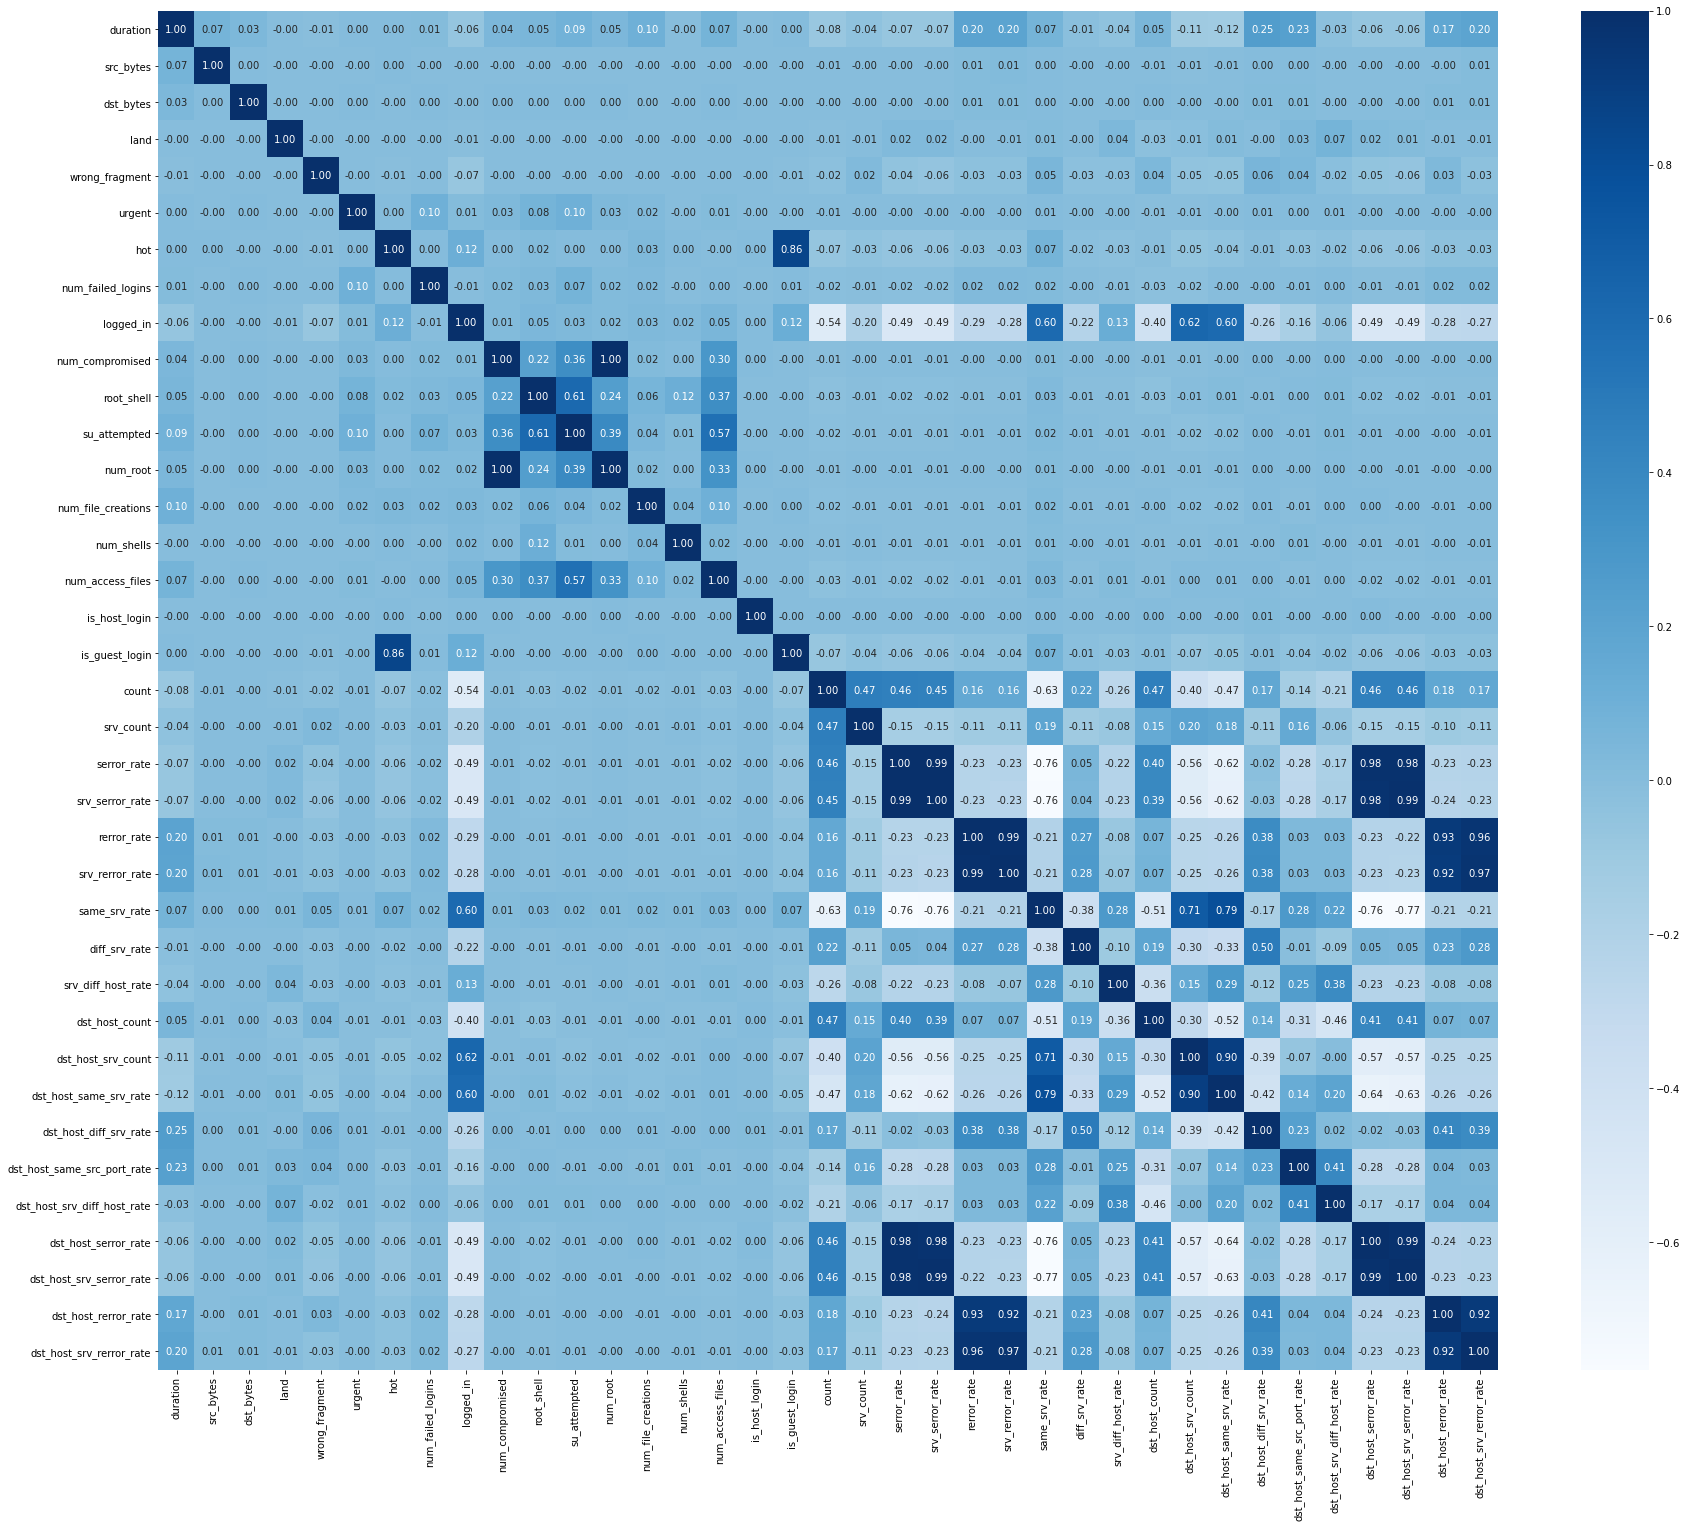

In [26]:
plt.subplots(figsize=(30, 25))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, fmt='0.2f')


In [27]:
df_train.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

Exploring attacks in the dataset

In [28]:
# Number of attacks in the Dataset
df_train[df_train["label"] != 'normal']['label'].nunique()


22

In [29]:
df_train[df_train["label"] != 'normal']['label'].value_counts()
# from it is clear that neptune attack is most common and spy attack is the least attackers prefer


neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Attacks like spy,perl,phf,mutlihop,ftp_write,loadmodule, have instances less than 10 so we will drop these since there will not be sufficient training data.
We can also take this threshold till 20 but here till 10 it considered only.

In [30]:
df_train = df_train.replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_train = df_train.dropna()
df_train['label'].value_counts()


normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
Name: label, dtype: int64

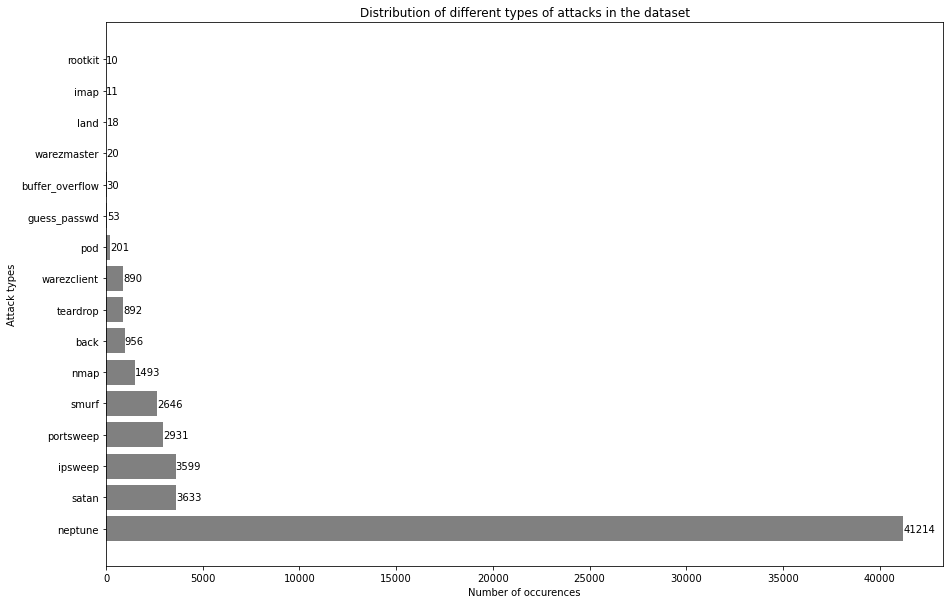

In [31]:
plt.figure(figsize=(15, 10))

attack = ("neptune", 'satan', "ipsweep", "portsweep", 'smurf', "nmap", 'back', 'teardrop', 'warezclient', 'pod', 'guess_passwd', 'buffer_overflow', 'warezmaster',
          "land", 'imap', 'rootkit')
y_pos = np.arange(len(attack))
amount = df_train['label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='Grey')
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1, str(v))


In [32]:
df_test = df_test.replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_test = df_test.dropna()
df_test['label'].value_counts()


normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
worm                  2
sqlattack             2
udpstorm              2
imap                  1
Name: label, dtype: int64

In [33]:
for i in list(df_train.columns):
    if(df_train[i].dtypes == "object"):
        print(i)


protocol_type
service
flag
label


{dtype('int64'): 22, dtype('float64'): 15, dtype('O'): 4}
['int64', 'object', 'float64'] [22, 15, 4]


<BarContainer object of 3 artists>

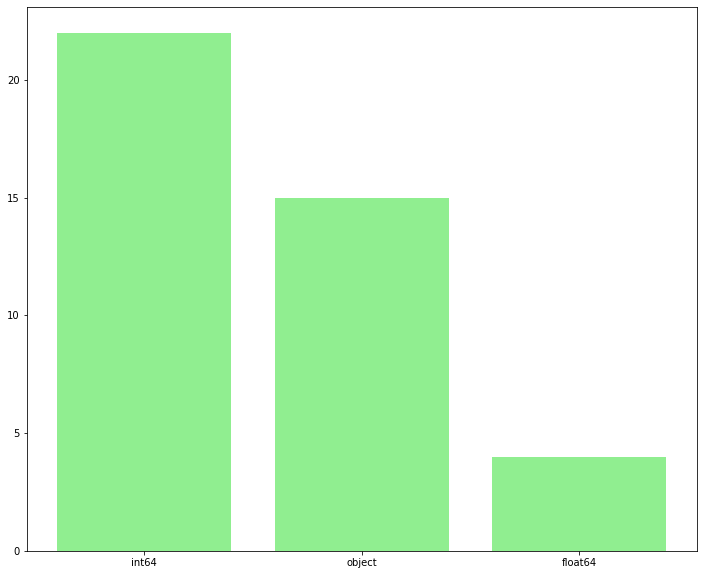

In [34]:
listdata = df_train.dtypes.tolist()
datatype = {}
for i in set(listdata):
    datatype[i] = listdata.count(i)
print(datatype)
X = ["int64", 'object', 'float64']
Y = list(datatype.values())
print(X, Y)
plt.figure(figsize=(12, 10))
plt.bar(X, Y, color="lightgreen")


From above cell it is clear that we have 4 columns having object data type and will not contribute to the model training.so converting them into numberical values by encoding Except Label that is our target column.

In [35]:
print('Training set:')
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'object':
        unique_cat = len(df_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(
            col_name=col_name, unique_cat=unique_cat))
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object':
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(
            col_name=col_name, unique_cat=unique_cat))


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 17 categories
Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 33 categories


AS DISCUSSED EARLIER FROM ABOVE CELL IT IS CLEAR THAT TEST DATASET DOESNOT HAVE SAME CATEGORIES IN SERVICE SO NEED TO BE ADDED AS EMPTY COLUMNS TO MAKE IT EVEN.
ALSO TOTAL DUMMY VARIABLES REQUIRED ARE=3+70+11=84

In [36]:
objects = ['protocol_type', 'service', 'flag']
# Get the categorical values into a 2D numpy array
df_train_object = df_train[objects]
df_test_object = df_test[objects]


Created dataframe for the categorical columns

In [37]:
df_train_object.head()


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [38]:
df_test_object.head()


,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


Creating all the unique values of these columns into columns to be converted to values later

In [39]:
# protocol type
unique_protocol = sorted(df_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
# service
unique_service = sorted(df_train.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
# flag
unique_flag = sorted(df_train.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]
# put together
traindumcols = unique_protocol2 + unique_service2 + unique_flag2
print(len(traindumcols))

# do same for test set
unique_service_test = sorted(df_test.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2
print(len(testdumcols))


84
78


In [40]:
# Transform categorical features into numbers using LabelEncoder()
df_train_object_enc = df_train_object.apply(LabelEncoder().fit_transform)
print(df_train_object_enc.head())
# test set
df_test_object_enc = df_test_object.apply(LabelEncoder().fit_transform)
print(df_test_object_enc.head())


   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [41]:
# One-Hot-Encoding¶
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(
    df_train_object_enc)
dataset_train_cat_data = pd.DataFrame(
    dataset_train_categorical_values_encenc.toarray(), columns=traindumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(df_test_object_enc)
dataset_test_cat_data = pd.DataFrame(
    dataset_test_categorical_values_encenc.toarray(), columns=testdumcols)


In [42]:
dataset_train_cat_data.head()


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
dataset_test_cat_data.head()


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add 6 missing categories from train set to test set

In [44]:
trainservice = df_train['service'].tolist()
testservice = df_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference = [string + x for x in difference]
difference


['service_urh_i',
 'service_http_2784',
 'service_http_8001',
 'service_aol',
 'service_harvest',
 'service_red_i']

In [45]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape


(22517, 84)

Join encoded categorical dataframe with the non-categorical dataframe

In [46]:
newdf_train = df_train.join(dataset_train_cat_data)
newdf_train.drop('flag', axis=1, inplace=True)
newdf_train.drop('protocol_type', axis=1, inplace=True)
newdf_train.drop('service', axis=1, inplace=True)
# test data
newdf_test = df_test.join(dataset_test_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf_train.shape)
print(newdf_test.shape)


(125940, 122)
(22517, 122)


In [47]:
from time import time


In [48]:
newdf_train['label'].unique()


array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'land'], dtype=object)

newdf.dtypes

In [49]:
newdf_train.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
newdf_test.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_http_2784,service_http_8001,service_aol,service_harvest,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting For model training

In [51]:
df_train_label = newdf_train['label']
df_test_label = newdf_test['label']


In [52]:
df_train_label[df_train_label != 'normal'] = 'attack'
df_train_label.value_counts()


normal    67343
attack    58597
Name: label, dtype: int64

In [53]:
df_test_label[df_test_label != 'normal'] = 'attack'
df_test_label.value_counts()


attack    12806
normal     9711
Name: label, dtype: int64

Feature Scaling

Taking all the features into consideration

In [54]:
newdf_copied = newdf_train


In [55]:
newdf_test_copied = newdf_test


In [56]:
newdf_copied.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
newdf_copied.drop(columns="label", axis=1, inplace=True)


In [58]:
Y_train = df_train_label


In [59]:
newdf_test_copied.drop(columns="label", axis=1, inplace=True)


In [60]:
Y_test = df_test_label


In [61]:
print('label' in newdf_test_copied.columns.tolist())
print('label' in newdf_test_copied.columns.tolist())


False
False


In [62]:
X_train = newdf_copied
X_test = newdf_test_copied


In [63]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)


(125940, 121)
(22517, 121)
(22517,)
(125940,)


MINMAX SCALER IS USED HERE FOR NORMALIZATION

In [64]:
any(X_train.dtypes == "object")

False

In [65]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_http_2784,service_http_8001,service_aol,service_harvest,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22540,0,317,938,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22541,0,54540,8314,0,0,0,2,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22542,0,42,42,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125969,8,105,145,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125970,0,2231,384,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125971,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
Y_test

0        attack
1        attack
2        normal
3        attack
4        attack
          ...  
22539    normal
22540    normal
22541    attack
22542    normal
22543    attack
Name: label, Length: 22517, dtype: object

In [68]:
Y_train

0         normal
1         normal
2         attack
3         normal
4         normal
           ...  
125968    attack
125969    normal
125970    normal
125971    attack
125972    normal
Name: label, Length: 125940, dtype: object

In [69]:
scaler = MinMaxScaler()

In [100]:
# scaler1=StandardScaler()
# USE IT NEXT TIME


In [70]:
scaler.fit(X_train)

MinMaxScaler()

In [71]:
X_train = scaler.transform(X_train)

In [72]:
X_train

array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.05799870e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.61670897e-06, 2.93143779e-07, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 1.09423153e-07, 0.00000000e+00, ...,
                   nan,            nan,            nan]])

X_train have nan values in it after normalization so we need to remove these values
Here I have used mean values to replace them

In [73]:
import numpy.ma as ma
X_train = np.where(np.isnan(X_train), ma.array(
    X_train, mask=np.isnan(X_train)).mean(axis=0), X_train)

In [74]:
X_train

array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.05799870e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.61670897e-06, 2.93143779e-07, ...,
        3.89176138e-04, 5.94819986e-01, 2.15238231e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.89176138e-04, 5.94819986e-01, 2.15238231e-03],
       [0.00000000e+00, 1.09423153e-07, 0.00000000e+00, ...,
        3.89176138e-04, 5.94819986e-01, 2.15238231e-03]])

Similar Normalization for test dataset is done

In [75]:
scalerTest = MinMaxScaler()
scalerTest.fit(X_test)
X_test = scalerTest.transform(X_test)

In [76]:
X_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.46530365e-05, 2.06651271e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 8.68116792e-04, 6.17715522e-03, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 6.68516782e-07, 3.12052585e-05, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan]])

This also have nan values

In [77]:
X_test = np.where(np.isnan(X_test), ma.array(
    X_test, mask=np.isnan(X_test)).mean(axis=0), X_test)


In [78]:
X_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.46530365e-05, 2.06651271e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 8.68116792e-04, 6.17715522e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.68516782e-07, 3.12052585e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Machine Learning Models are implemented now as the data is cleaned  and scaled to feed to the model.

FIRST CLASSIFIER USED IS LOGISTIC REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression

Training the model


In [80]:
clf = LogisticRegression()
t0 = time()
clf.fit(X_train, Y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 4.17 seconds.


Predicting using test dataset

In [81]:
t0 = time()
pred = clf.predict(X_test)
tt = time() - t0
print(pred)
print(len(pred))
print("Predicted in {} seconds".format(round(tt, 3)))


['attack' 'attack' 'normal' ... 'normal' 'normal' 'attack']
22517
Predicted in 0.015 seconds


Measuring Accuracy using various metrics like accuracy score, classification_report,confusion matrix

In [82]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, pred)
print("Accuracy is {}.".format(round(acc, 4)))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(score(Y_test, pred))
print(completeness_score(Y_test, pred))
print(homogeneity_score(Y_test, pred))
print(v_measure_score(Y_test, pred))


Accuracy is 0.7408.
[[7626 5180]
 [ 656 9055]]
              precision    recall  f1-score   support

      attack       0.92      0.60      0.72     12806
      normal       0.64      0.93      0.76      9711

    accuracy                           0.74     22517
   macro avg       0.78      0.76      0.74     22517
weighted avg       0.80      0.74      0.74     22517

(array([0.92079208, 0.63610818]), array([0.59550211, 0.93244774]), array([0.72325493, 0.75628497]), array([12806,  9711], dtype=int64))
0.2544477572324238
0.24481191446566045
0.24953684870118178


SUPPORT VECTOR MACHINE CLASSIFIER

In [83]:
clf1 = LinearSVC(random_state=0)
t0 = time()
clf1.fit(X_train, Y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))


Classifier trained in 4.464 seconds.


In [84]:
t0 = time()
predsvm = clf1.predict(X_test)
tt = time() - t0
print("Predicted in {} seconds".format(round(tt, 3)))
predsvm

Predicted in 0.016 seconds


array(['attack', 'attack', 'normal', ..., 'normal', 'normal', 'attack'],
      dtype=object)

In [85]:
accSVM = accuracy_score(Y_test, predsvm)
print("Accuracy is {}.".format(round(accSVM, 4)))
print(confusion_matrix(Y_test, predsvm))
print(classification_report(Y_test, predsvm))
print(score(Y_test, predsvm))
print(completeness_score(Y_test, predsvm))
print(homogeneity_score(Y_test, predsvm))
print(v_measure_score(Y_test, predsvm))


Accuracy is 0.7409.
[[7697 5109]
 [ 726 8985]]
              precision    recall  f1-score   support

      attack       0.91      0.60      0.73     12806
      normal       0.64      0.93      0.75      9711

    accuracy                           0.74     22517
   macro avg       0.78      0.76      0.74     22517
weighted avg       0.79      0.74      0.74     22517

(array([0.91380743, 0.63750532]), array([0.60104638, 0.92523942]), array([0.72514014, 0.75488343]), array([12806,  9711], dtype=int64))
0.2479944957044839
0.23980278422449677
0.2438298571527236


DECISION TREE CLASSIFIER

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
t0 = time()
clf2.fit(X_train, Y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))


Classifier trained in 2.281 seconds.


In [87]:

t0 = time()
predDT = clf2.predict(X_test)
tt = time() - t0
print("Predicted in {} seconds".format(round(tt, 3)))


Predicted in 0.028 seconds


In [88]:
accDT = accuracy_score(Y_test, predDT)
print("Accuracy is {}.".format(round(accDT, 4)))
print(confusion_matrix(Y_test, predDT))
print(classification_report(Y_test, predDT))
print(score(Y_test, predDT))
print(completeness_score(Y_test, predDT))
print(homogeneity_score(Y_test, predDT))
print(v_measure_score(Y_test, predDT))


Accuracy is 0.7655.
[[8282 4524]
 [ 757 8954]]
              precision    recall  f1-score   support

      attack       0.92      0.65      0.76     12806
      normal       0.66      0.92      0.77      9711

    accuracy                           0.77     22517
   macro avg       0.79      0.78      0.77     22517
weighted avg       0.81      0.77      0.76     22517

(array([0.9162518 , 0.66434189]), array([0.6467281 , 0.92204716]), array([0.75825132, 0.77226271]), array([12806,  9711], dtype=int64))
0.27638841826150395
0.2723119543909685
0.2743350436741478


RANDOM FOREST CLASSIFIER 

In [105]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
t0 = time()
clf3.fit(X_train, Y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))


Classifier trained in 44.364 seconds.


In [106]:

t0 = time()
predRF = clf3.predict(X_test)
tt = time() - t0
print("Predicted in {} seconds".format(round(tt, 3)))
print(predRF)


Predicted in 0.45 seconds
['attack' 'attack' 'normal' ... 'attack' 'normal' 'attack']


In [107]:
accRF = accuracy_score(Y_test, predRF)
print("Accuracy is {}.".format(round(accRF, 4)))
print(confusion_matrix(Y_test, predRF))
print(classification_report(Y_test, predRF))
print(score(Y_test, predRF))
print(completeness_score(Y_test, predRF))
print(homogeneity_score(Y_test, predRF))
print(v_measure_score(Y_test, predRF))


Accuracy is 0.7341.
[[7534 5272]
 [ 715 8996]]
              precision    recall  f1-score   support

      attack       0.91      0.59      0.72     12806
      normal       0.63      0.93      0.75      9711

    accuracy                           0.73     22517
   macro avg       0.77      0.76      0.73     22517
weighted avg       0.79      0.73      0.73     22517

(array([0.91332283, 0.63050182]), array([0.58831798, 0.92637216]), array([0.71564949, 0.7503232 ]), array([12806,  9711], dtype=int64))
0.2409473115383116
0.2315413454336238
0.23615070486447215


COMPARING ON THE BASIS OF ACCURACY SCORE

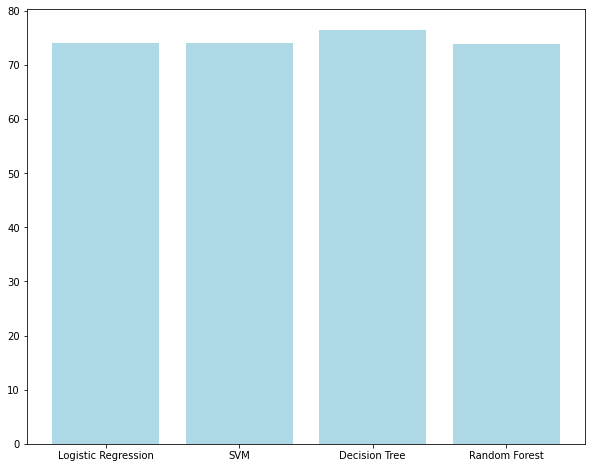

In [119]:
names=['Logistic Regression','SVM','Decision Tree','Random Forest']
AccuracyValues=[0.7408*100,0.7409*100,0.7655*100,0.7394*100]
plt.figure(figsize=(10,8))
plt.bar(names,AccuracyValues,color="lightblue")
plt.show()

COMPARISON ON BASIS OF CONFUSION MATRIX

In [120]:
print("confusion_matrix for Logistic regression is: ")
print(confusion_matrix(Y_test, pred))
print()

print("confusion_matrix for SVM is: ")
print(confusion_matrix(Y_test,predsvm))
print()

print("confusion_matrix for Decision Tree is: ")
print(confusion_matrix(Y_test,predDT))
print()

print("confusion_matrix for random forest is: ")
print(confusion_matrix(Y_test,predRF))
print()


confusion_matrix for Logistic regression is: 
[[7626 5180]
 [ 656 9055]]

confusion_matrix for SVM is: 
[[7697 5109]
 [ 726 8985]]

confusion_matrix for Decision Tree is: 
[[8282 4524]
 [ 757 8954]]

confusion_matrix for random forest is: 
[[7534 5272]
 [ 715 8996]]



COMPARISON ON BASIS OF CLASSIFICATION REPORT

In [122]:
print("classification report for Logistic regression is: ")
print(classification_report(Y_test, pred))


print("classification report for SVM is: ")
print(classification_report(Y_test,predsvm))


print("classification report for Decision Tree is: ")
print(classification_report(Y_test,predDT))

print("classification report for random forest is: ")
print(classification_report(Y_test,predRF))



classification report for Logistic regression is: 
              precision    recall  f1-score   support

      attack       0.92      0.60      0.72     12806
      normal       0.64      0.93      0.76      9711

    accuracy                           0.74     22517
   macro avg       0.78      0.76      0.74     22517
weighted avg       0.80      0.74      0.74     22517

classification report for SVM is: 
              precision    recall  f1-score   support

      attack       0.91      0.60      0.73     12806
      normal       0.64      0.93      0.75      9711

    accuracy                           0.74     22517
   macro avg       0.78      0.76      0.74     22517
weighted avg       0.79      0.74      0.74     22517

classification report for Decision Tree is: 
              precision    recall  f1-score   support

      attack       0.92      0.65      0.76     12806
      normal       0.66      0.92      0.77      9711

    accuracy                           0.77     225

In [ ]:
AccuracyScore=[0.7408*100,0.7409*100,0.7655*100,0.7394*100]
names1=['Logistic Regression','SVM','Decision Tree','Random Forest']
completenessScore=[0.2544477572324238,0.2479944957044839,0.27638841826150395,0.2409473115383116]

